In [1]:
%pip install pandas numpy matplotlib seaborn scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("housing.csv")

In [4]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [5]:
data.info()
#because there are null values in total_bedrooms we can drop those values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


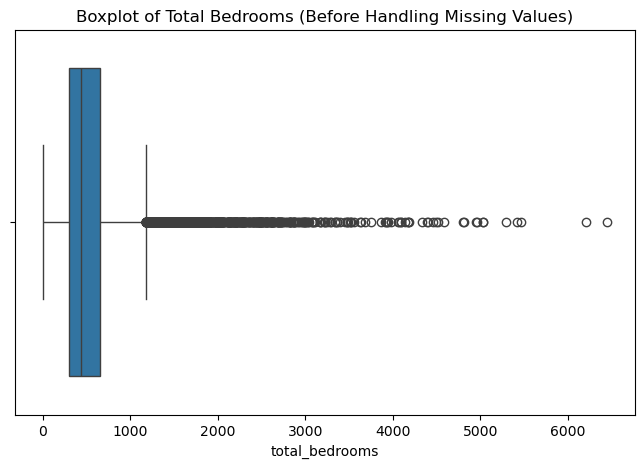

In [6]:
plt.figure(figsize=(8,5))
sns.boxplot(x=data['total_bedrooms'])
plt.title("Boxplot of Total Bedrooms (Before Handling Missing Values)")
plt.xlabel("total_bedrooms")
plt.show()

In [7]:
data.dropna(inplace=True)
#this drops the null values and saves the result in the data object

In [8]:
data.info()
#only has non null values

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


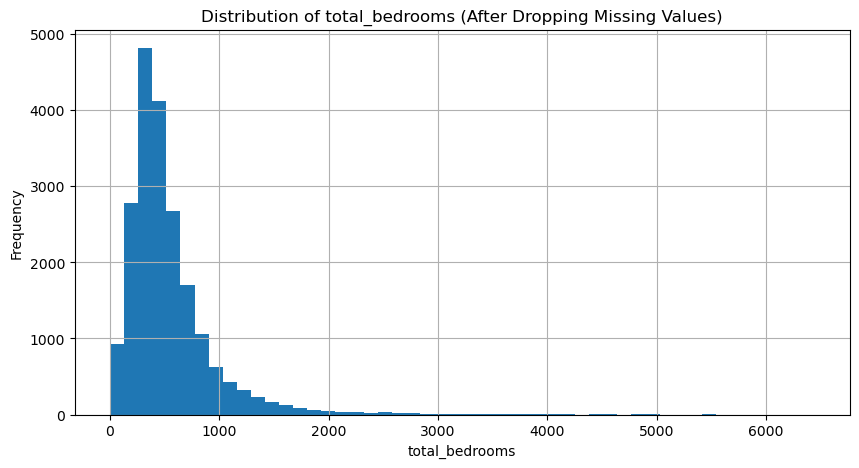

In [9]:
#after handling
plt.figure(figsize=(10,5))
data['total_bedrooms'].hist(bins=50)
plt.title("Distribution of total_bedrooms (After Dropping Missing Values)")
plt.xlabel("total_bedrooms")
plt.ylabel("Frequency")
plt.show()

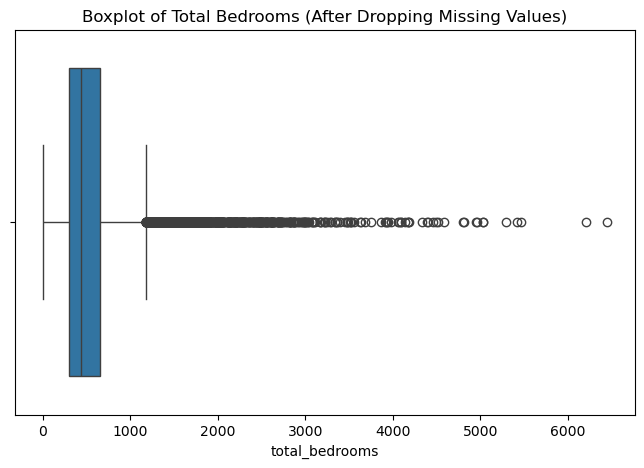

In [10]:
plt.figure(figsize=(8,5))
sns.boxplot(x=data['total_bedrooms'])
plt.title("Boxplot of Total Bedrooms (After Dropping Missing Values)")
plt.show()

In [11]:
from sklearn.model_selection import train_test_split
#X is the dataframe without the target variable
#y is the dataframe that only has the target variable
X = data.drop(['median_house_value'],axis=1)
y= data['median_house_value']

In [12]:
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND


In [13]:
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20433, dtype: float64

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [15]:
train_data = X_train.join(y_train)

In [16]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
17977,-121.97,37.31,25.0,5775.0,1225.0,3580.0,1138.0,3.9187,<1H OCEAN,314900.0
5924,-117.76,34.13,8.0,16759.0,2274.0,7249.0,2156.0,7.4837,INLAND,358700.0
4875,-118.28,34.03,26.0,2107.0,809.0,2821.0,572.0,0.8440,<1H OCEAN,350000.0
14457,-117.27,32.82,35.0,2908.0,595.0,1068.0,529.0,4.1793,NEAR OCEAN,500001.0
18042,-121.96,37.22,35.0,4709.0,723.0,1866.0,694.0,8.4920,<1H OCEAN,500001.0
...,...,...,...,...,...,...,...,...,...,...
12686,-121.48,38.59,43.0,987.0,240.0,1253.0,237.0,0.9204,INLAND,82100.0
18960,-122.04,38.25,32.0,1203.0,287.0,571.0,255.0,3.0938,INLAND,110400.0
16223,-121.32,37.98,37.0,3247.0,643.0,1737.0,665.0,3.0660,INLAND,94100.0
17882,-122.01,37.40,24.0,1297.0,297.0,441.0,282.0,3.1439,<1H OCEAN,47500.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

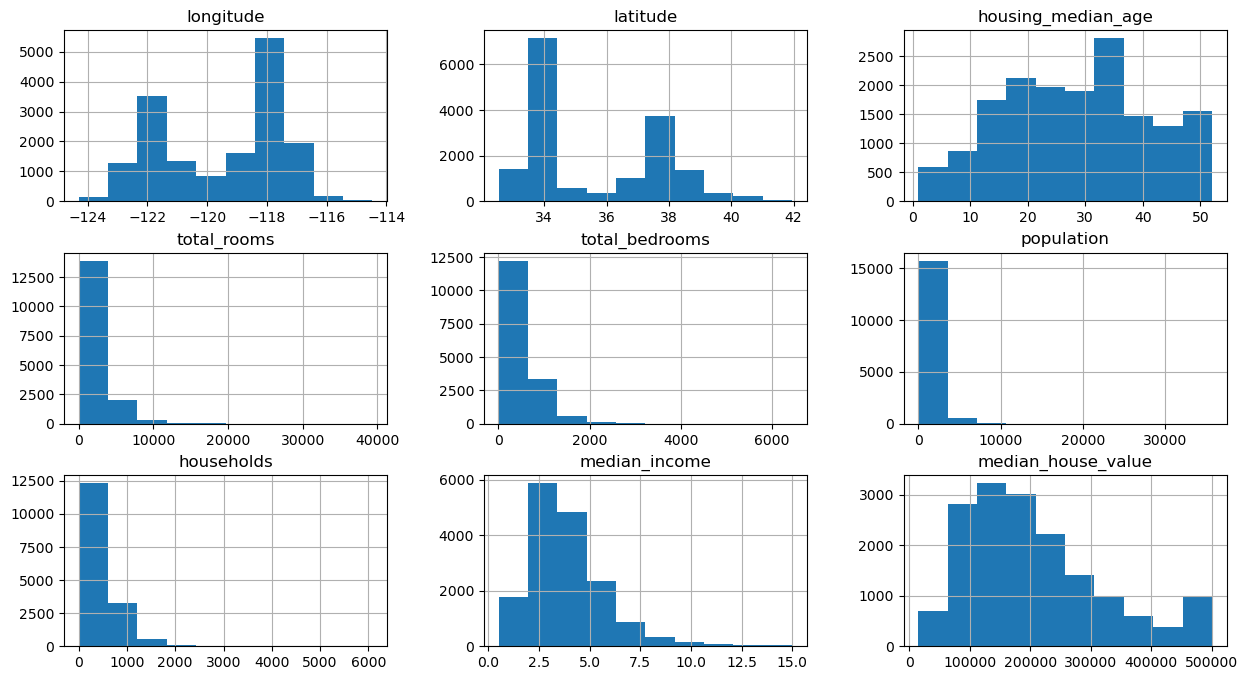

In [17]:
train_data.hist(figsize=(15,8))

<Axes: >

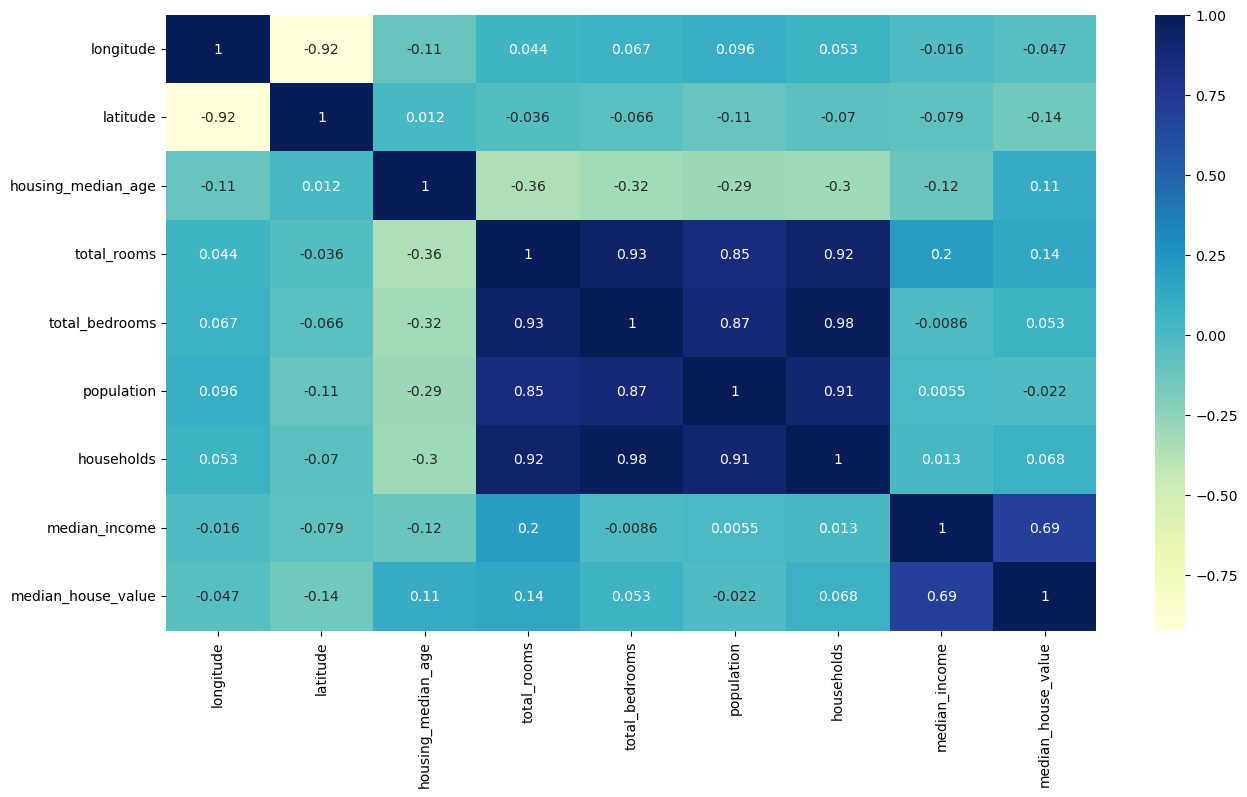

In [18]:
numeric_data = train_data.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(15,8))
sns.heatmap(numeric_data.corr(), annot=True, cmap="YlGnBu")

In [19]:
#data processing
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

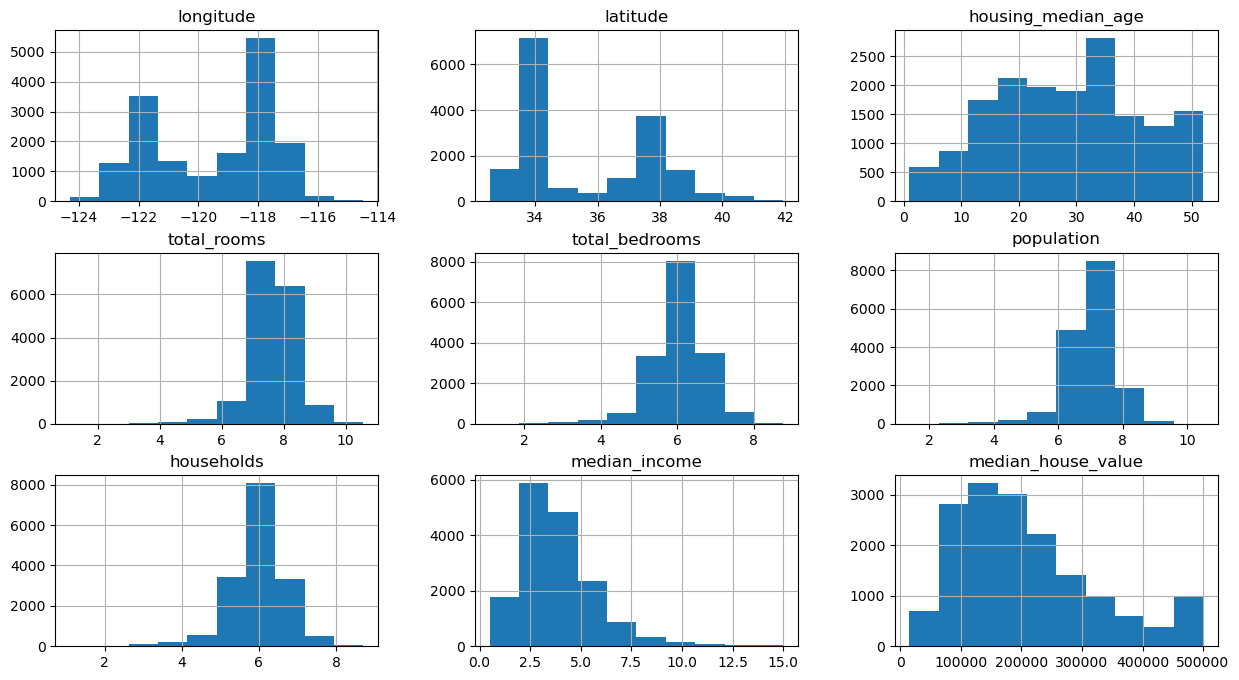

In [20]:
train_data.hist(figsize = (15,8))

In [21]:
#encode the ocean proximity (one-hot encoding)
train_data.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     7244
INLAND        5171
NEAR OCEAN    2081
NEAR BAY      1846
ISLAND           4
Name: count, dtype: int64

In [22]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity, dtype=int)).drop(['ocean_proximity'], axis=1)

In [23]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
17977,-121.97,37.31,25.0,8.661467,7.111512,8.183397,7.037906,3.9187,314900.0,1,0,0,0,0
5924,-117.76,34.13,8.0,9.726750,7.729735,8.888757,7.676474,7.4837,358700.0,0,1,0,0,0
4875,-118.28,34.03,26.0,7.653495,6.697034,7.945201,6.350886,0.8440,350000.0,1,0,0,0,0
14457,-117.27,32.82,35.0,7.975565,6.390241,6.974479,6.272877,4.1793,500001.0,0,0,0,0,1
18042,-121.96,37.22,35.0,8.457443,6.584791,7.532088,6.543912,8.4920,500001.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12686,-121.48,38.59,43.0,6.895683,5.484797,7.134094,5.472271,0.9204,82100.0,0,1,0,0,0
18960,-122.04,38.25,32.0,7.093405,5.662960,6.349139,5.545177,3.0938,110400.0,0,1,0,0,0
16223,-121.32,37.98,37.0,8.085795,6.467699,7.460490,6.501290,3.0660,94100.0,0,1,0,0,0
17882,-122.01,37.40,24.0,7.168580,5.697093,6.091310,5.645447,3.1439,47500.0,1,0,0,0,0


<Axes: >

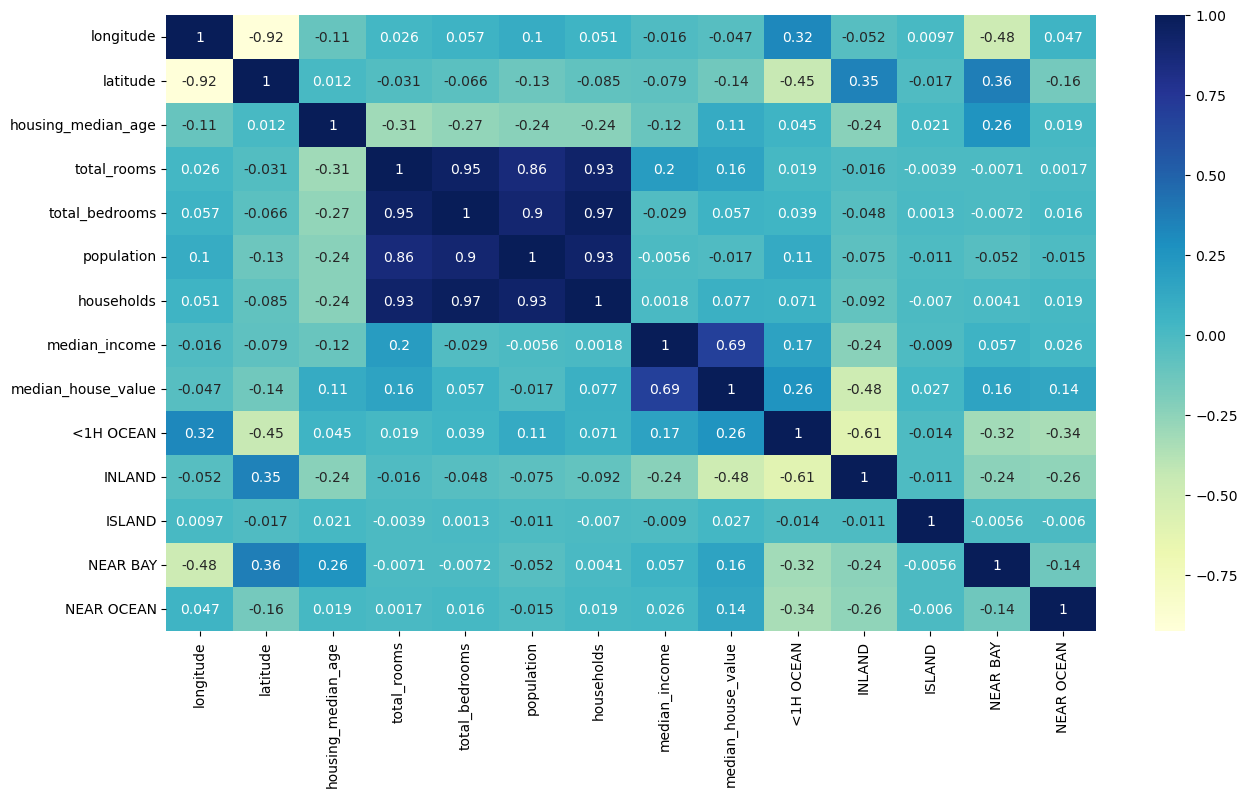

In [24]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

<Axes: xlabel='latitude', ylabel='longitude'>

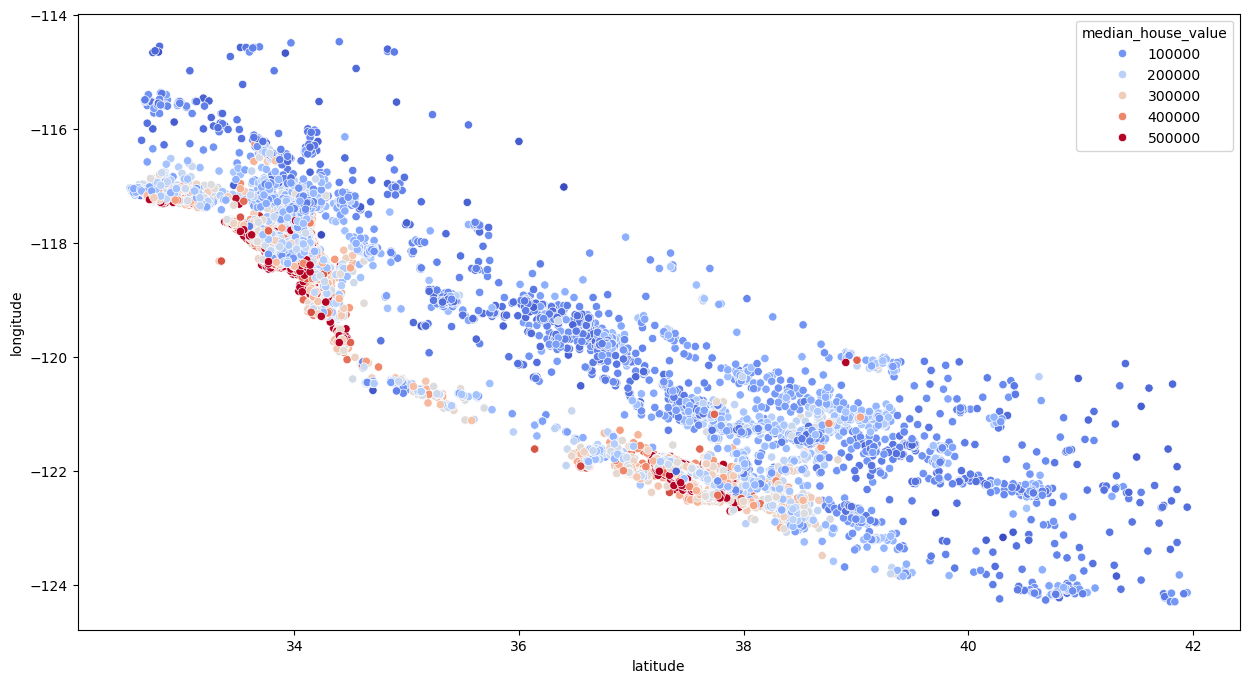

In [25]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="latitude", y="longitude", data=train_data, hue="median_house_value", palette="coolwarm")

In [26]:
# Step 1: Identify numeric columns
#the points outside the whiskers are outliers
numeric_cols = data.select_dtypes(include='number').columns

# Step 2: Compute Q1, Q3, and IQR for only numeric columns
Q1 = data[numeric_cols].quantile(0.25)
Q3 = data[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

# Step 3: Filter rows that are NOT outliers in any numeric column
# Keep only rows where all numeric values are within the IQR bounds
condition = ~((data[numeric_cols] < (Q1 - 1.5 * IQR)) | (data[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)

# Step 4: Apply this condition to the full DataFrame (all columns)
data_cleaned = data[condition]

# Step 5: Check the new shape
print(data_cleaned.shape)


(17434, 10)


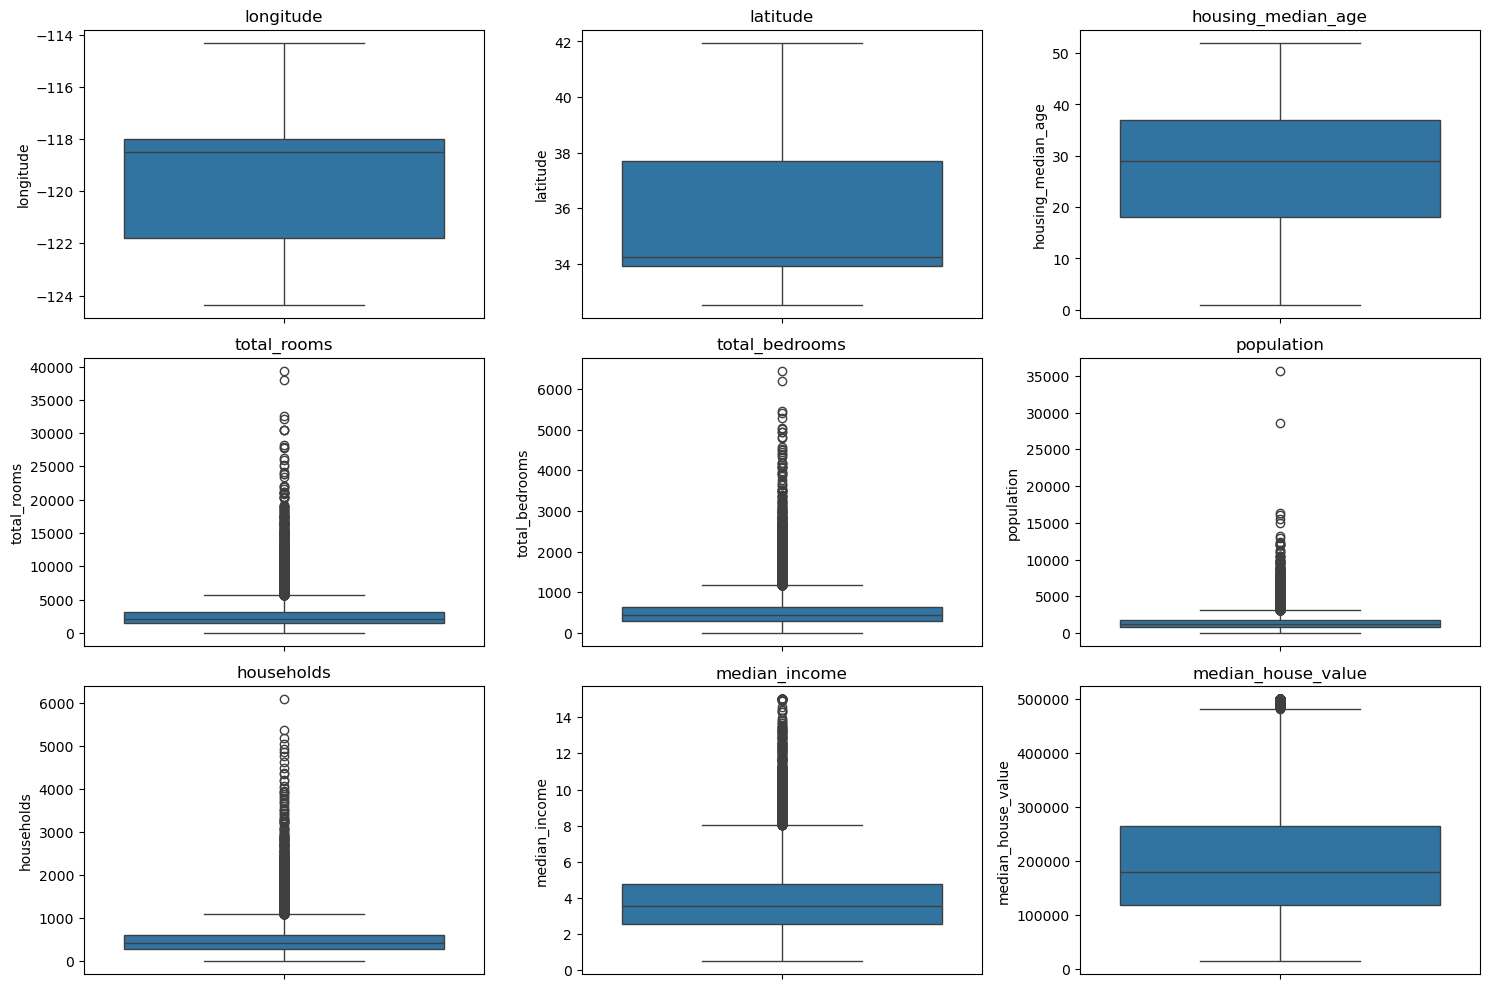

In [27]:
plt.figure(figsize=(15,10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=data[col])
    plt.title(col)
plt.tight_layout()
plt.show()


In [28]:
# Step 1: Identify numeric columns
numeric_cols = data.select_dtypes(include='number').columns

# Step 2: Compute Q1, Q3, and IQR
Q1 = data[numeric_cols].quantile(0.25)
Q3 = data[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

# Step 3: Keep only rows where all numeric values are within bounds
condition = ~((data[numeric_cols] < (Q1 - 1.5 * IQR)) | 
              (data[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)

# Step 4: Create cleaned dataset
data_cleaned = data[condition]

print("Original shape:", data.shape)
print("After outlier removal:", data_cleaned.shape)


Original shape: (20433, 10)
After outlier removal: (17434, 10)


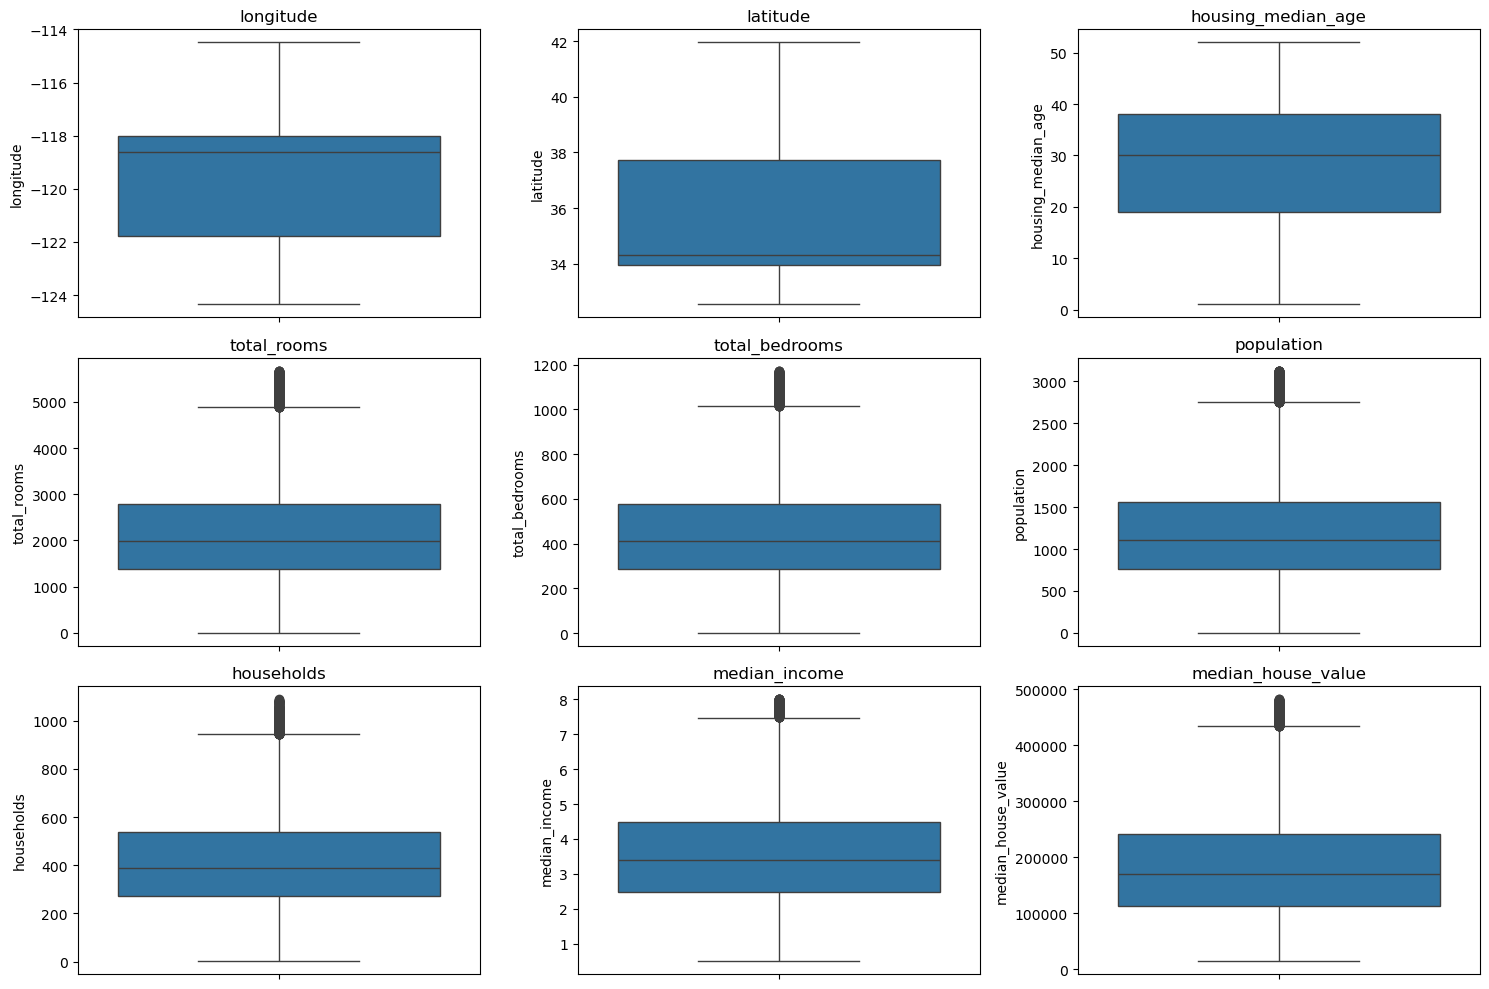

In [29]:
plt.figure(figsize=(15,10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=data_cleaned[col])  # <- use data_cleaned
    plt.title(col)
plt.tight_layout()
plt.show()


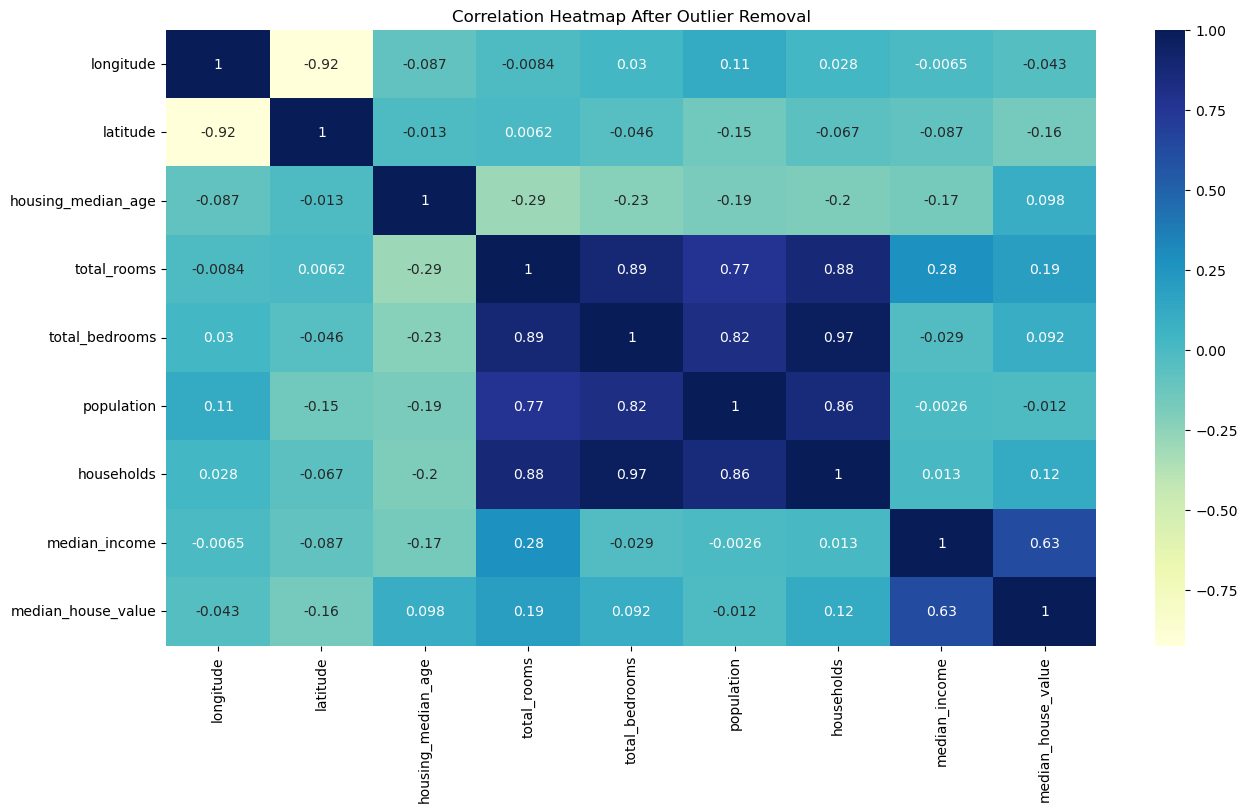

In [30]:
numeric_data = data_cleaned.select_dtypes(include=['number'])

plt.figure(figsize=(15,8))
sns.heatmap(numeric_data.corr(), annot=True, cmap="YlGnBu")
plt.title("Correlation Heatmap After Outlier Removal")
plt.show()

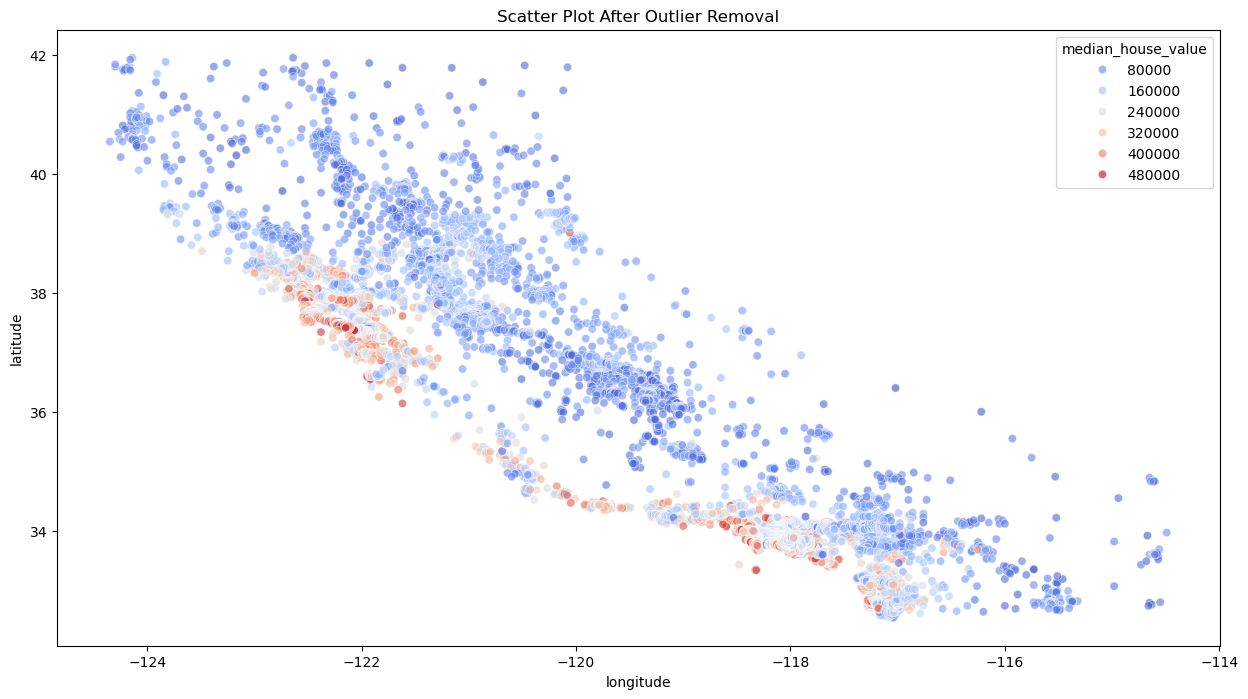

In [31]:
plt.figure(figsize=(15,8))
sns.scatterplot(
    x="longitude", 
    y="latitude", 
    data=data_cleaned, 
    hue="median_house_value", 
    palette="coolwarm",
    alpha=0.6
)
plt.title("Scatter Plot After Outlier Removal")
plt.show()

In [32]:
# Select numeric columns
# normalization
numeric_cols = data_cleaned.select_dtypes(include='number').columns

# Normalize each numeric column
data_normalized = data_cleaned.copy()
data_normalized[numeric_cols] = (data_cleaned[numeric_cols] - data_cleaned[numeric_cols].min()) / \
                                 (data_cleaned[numeric_cols].max() - data_cleaned[numeric_cols].min())

print(data_normalized.head())


   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
2   0.213996  0.564293                 1.0     0.258241        0.160547   
3   0.212982  0.564293                 1.0     0.224220        0.198975   
4   0.212982  0.564293                 1.0     0.286445        0.237404   
5   0.212982  0.564293                 1.0     0.161643        0.180188   
6   0.212982  0.563231                 1.0     0.446501        0.415884   

   population  households  median_income  median_house_value ocean_proximity  
2    0.157962    0.160846       0.899633            0.721533        NEAR BAY  
3    0.177828    0.199449       0.684719            0.698417        NEAR BAY  
4    0.180070    0.236213       0.445496            0.700343        NEAR BAY  
5    0.131368    0.175551       0.470871            0.545164        NEAR BAY  
6    0.349567    0.470588       0.420587            0.608306        NEAR BAY  


In [33]:
#feature engineering
data_cleaned = data[condition].copy()  # add .copy()

data_cleaned['bedroom_ratio'] = data_cleaned['total_bedrooms']/data_cleaned['total_rooms']
data_cleaned['household_rooms'] = data_cleaned['total_rooms']/data_cleaned['households']

In [34]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
